In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stat
import statsmodels.api as sm

In [2]:
#Load up csv ke dalam Panda DataFrame
df = pd.read_csv ("nyc-rolling-sales.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [4]:
#Convert column SALE PRICE dari object menjadi float
df ['SALE PRICE'] = pd.to_numeric (df ['SALE PRICE'], errors = 'coerce')


# Measure of Central Tendencies: Mode, Mean & Median

What is the mean, mode and median of sale price of buildings in New York?
What is the mean of sale price in buildings in Borough 1 alone?

In [5]:
#Menghilangkan value-value NaN, - dan 0 pada column SALE PRICE
missing_value = [0.0]
df_clean = df.copy()
df_clean ['SALE PRICE'].replace (to_replace = missing_value, value = np.nan, inplace = True)
df_clean = df_clean.dropna()
df_clean

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000.0,2017-07-19 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272.0,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000.0,2016-11-17 00:00:00
6,10,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,,C4,210 AVENUE B,...,8,0,8,1750,4226,1920,2,C4,3192840.0,2016-09-23 00:00:00
9,13,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,,D9,629 EAST 5TH STREET,...,24,0,24,4489,18523,1920,2,D9,16232000.0,2016-11-07 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000.0,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000.0,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000.0,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337.0,2016-12-21 00:00:00


In [6]:
df_clean ['SALE PRICE'].mean() #function to find mean

1494927.306497766

In [7]:
df_clean ['SALE PRICE'].median() #function to find median

625500.0

In [8]:
df_clean ['SALE PRICE'].mode() # function to find mode

0    10.0
dtype: float64

In [9]:
#Filtering Building in Borough 1
borough_1 = df_clean [df_clean ['BOROUGH']==1]

#Finding mean sale price of buildings in Borough 1
borough_1 ['SALE PRICE'].mean()

3337951.2707943763

Insight:
- Sale Price with the value of 0 is taken out in order to know the real mean of Sales transaction 
- The average price of property sales is $1,494,927.31
- The median price of property sales is $ 625,500
- The mode of property sales price is $10
- The average building sales price in Borough 1 ($3,337,951.27) is much higher than average building sales price of New York. This could be due to the location of the Borough 1 is in Manhattan
- The distribution of sales price is positively skewed since the Median < Mean

# Measure of Spread : Range, Variance and Standard Deviation 

What is the range, variance and standard deviation in year built?

In [12]:
# looking from the datasets, only 1 building that was built on 1111. This could be indication of mistype or inaccurate data?
filter = df_spread ['YEAR BUILT'] == 1111
df_spread [filter]

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE


In [11]:
#Removing missing value of year built at year 0 and also at year 1111 (outlier)
missing_value = [0,1111] 
df_spread = df.copy()
df_spread ['YEAR BUILT'].replace (to_replace = missing_value, value = np.nan, inplace = True)
df_spread ['YEAR BUILT'] = df_spread ['YEAR BUILT'].dropna()
df_spread.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      84548 non-null  int64  
 1   BOROUGH                         84548 non-null  int64  
 2   NEIGHBORHOOD                    84548 non-null  object 
 3   BUILDING CLASS CATEGORY         84548 non-null  object 
 4   TAX CLASS AT PRESENT            84548 non-null  object 
 5   BLOCK                           84548 non-null  int64  
 6   LOT                             84548 non-null  int64  
 7   EASE-MENT                       84548 non-null  object 
 8   BUILDING CLASS AT PRESENT       84548 non-null  object 
 9   ADDRESS                         84548 non-null  object 
 10  APARTMENT NUMBER                84548 non-null  object 
 11  ZIP CODE                        84548 non-null  int64  
 12  RESIDENTIAL UNITS               

In [13]:
df_spread ['YEAR BUILT'].describe() #function to find the std and range

count    77577.000000
mean      1950.095621
std         34.198032
min       1680.000000
25%       1925.000000
50%       1945.000000
75%       1970.000000
max       2017.000000
Name: YEAR BUILT, dtype: float64

In [14]:
df_spread ['YEAR BUILT'].var() #function to find the variance

1169.5054228432782

### Insight

- The range of year built is between year 1111 to year 2017
- the variance is 1169.50 which means the number in this dataset is far from each other and from the mean
- the Standard Deviation is 34.19 which means most of the building built is clustered around the mean year (1950)

# Probability Distribution

How is the distribution of YEAR BUILT?

<function matplotlib.pyplot.show(close=None, block=None)>

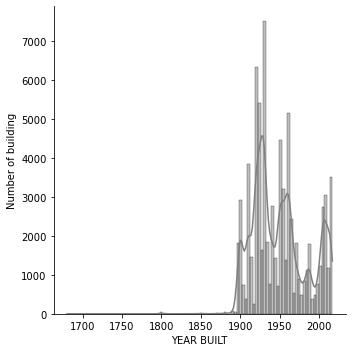

In [15]:
ax = sns.displot (df_spread ['YEAR BUILT'], bins =100,kde=True, color ='gray')
plt.ylabel ('Number of building')
plt.show

### Insight
- There are some outliers at around year ~1600 and ~1800
- The type of distribution from this dataset is probably uniform distribution since there are several peak amount of building built at around year ~ 1925, ~1950 and ~2015-2017
- Suprisingly, most of the buildings sold in New York during 2016-2017 were built at ~ 1925

# Confidence Interval

- When the buildings sold between 2016 to 2017 were built?

In [16]:
df_spread ['YEAR BUILT'].describe()

count    77577.000000
mean      1950.095621
std         34.198032
min       1680.000000
25%       1925.000000
50%       1945.000000
75%       1970.000000
max       2017.000000
Name: YEAR BUILT, dtype: float64

In [17]:

z=1.96 #measuring at confidence level 95%
mean = df_spread ['YEAR BUILT'].mean()
sd = df_spread ['YEAR BUILT'].std()
built_lower = mean - z*sd
built_upper = mean + z*sd
built_lower,built_upper

(1883.0674775402404, 2017.1237647093953)

### Insight

- we can be 95% confident that building sold between 2016 - 2017 in New York were built between 1883 to 2017

# Hypothesis Testing
whether the average price of building in Borough 2 is equal to average price of building in Borough 5?

Null Hypothesis: mu2 = m5
Alternative Hypothesis: mu2 ≠ mu5

In [18]:
borough_2 = df_clean [df_clean['BOROUGH'] == 2]
n1= len(borough_2)
mu1= borough_2 ['SALE PRICE'].mean()
sd1= borough_2 ['SALE PRICE'].std()


borough_5 = df_clean [df_clean['BOROUGH'] == 5]
n5= len(borough_5)
mu5= borough_5 ['SALE PRICE'].mean()
sd5= borough_5 ['SALE PRICE'].std()


In [19]:
sm.stats.ztest (borough_1 ['SALE PRICE'], borough_5 ['SALE PRICE'], alternative = 'two-sided')

(8.979015708324432, 2.7319977232304896e-19)

### Insight
since the p-value is too small, we can reject the null hypothesis that the average building sales in Borough 2 is not equal to Borough 5

## Overall Analysis

- The average price of property sales is 1,494,927.31
- The median price of property sales is 625,500
- Most of the buildings sold in New York during 2016-2017 were built at ~ 1925
-The mode of property sales price is $10 which means that most of the sale transaction are actually transfer of deeds between parties
-we can also be 95% confident that building sold between 2016 - 2017 in New York were built between 1883 to 2017
-While our hypothesis shows that average price of building in Borough 2 is not equal to Borough 5